# Part 2- Prescriptive Analysis

Import all libraries

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
%matplotlib inline
import seaborn as sns

Read the dataframe from previous analysis

In [58]:
df = pd.read_csv("../data/createdDataFrame.csv")

##  2.1 Transpose the data into a view as the reference given, (numbers presented here are not precise)



Check the original dataset

In [59]:
df.head()

,Year,Month,Segment,Region,KPI,Value Type,Value
0,2020,12,Clients,India,Lv1_Visitors,Actuals,36.65558
1,2020,12,Clients,India,Lv2_Visitors,Actuals,26.89569
2,2020,12,Clients,India,Lv3_Visitors,Actuals,13.00571
3,2020,12,Clients,India,Lv4_Visitors,Actuals,7.17608
4,2020,12,Clients,India,Lv3_Visitors,Actuals,7.06677


Transpose the data as per the requirements i.e to segerrate data based on KPI

In [60]:
# Creating a pivotable to seggregate the KPI values
transformed_df = df.pivot_table(values="Value", index=["Year","Month","Segment","Region","Value Type"], columns="KPI", aggfunc=np.sum)

# Removing multilevel columns to make it like desired output
transformed_df.columns.name = None
transformed_df.reset_index(inplace=True)

Displaying the transformed data

In [61]:
transformed_df

,Year,Month,Segment,Region,Value Type,Lv1_Visitors,Lv2_Visitors,Lv3_Visitors,Lv4_Visitors,Lv5_Visitors
0,2020,1,Clients,India,Actuals,33.22789,23.04318,24.10633,11.57186,3.63939
1,2020,1,Customers,Aurangabad,Actuals,0.07540,0.04992,0.06850,0.02157,0.00934
2,2020,1,Customers,Dehradun,Actuals,0.28903,0.21332,0.25380,0.08578,0.03875
3,2020,1,Customers,Faridabad,Actuals,0.14750,0.12968,0.17720,0.08025,0.02344
4,2020,1,Customers,India,Actuals,4.24743,3.26618,3.71396,1.58246,0.42569
...,...,...,...,...,...,...,...,...,...,...
295,2022,12,Customers,Dehradun,Actuals,0.28445,0.16806,0.08196,0.02561,0.00357
296,2022,12,Customers,Faridabad,Actuals,0.43786,0.31130,0.21086,0.04815,0.00399
297,2022,12,Customers,India,Actuals,4.09152,2.87220,2.05978,0.64707,0.04625
298,2022,12,Customers,Uddepy,Actuals,0.81802,0.49203,0.41606,0.16241,0.01492


Insights:  
* The shape of the transformed data is 300x10 whereas shape of original data was 1571x7

##  2.2  Assume you are a data analyst at Fittlyf company, analyze the data for the region performing worst in all the years and prescribe what could be the reason and how to improve the number of visitors from that region.




To compare the performance of the region across all 3 years we will plot the contribution percentage of each region for each year.

In [62]:
# Creating the dataset of relevent data from the original dataset
df_region_compare = df.drop(columns=["Month","Segment","Value Type"])

# Display the data
df_region_compare.head()

,Year,Region,KPI,Value
0,2020,India,Lv1_Visitors,36.65558
1,2020,India,Lv2_Visitors,26.89569
2,2020,India,Lv3_Visitors,13.00571
3,2020,India,Lv4_Visitors,7.17608
4,2020,India,Lv3_Visitors,7.06677


We will ignore "Indore" Region from analysis since it was introduced in the year 2022 and no prior data is present for comparison

In [63]:
df_region_compare = df_region_compare[df_region_compare["Region"] != "Indore"]

Begin analysis to identify worst performing regions

In [64]:
# Grouping the the data based on region and year
df_region_compare = df_region_compare.drop(columns=["KPI"]).groupby(by=["Region","Year"]).sum()

# Calculation the contribution percentage of all the regions with respect to each year
df_region_compare["% Contribution"] = 100*df_region_compare["Value"]/df_region_compare.groupby(by=["Region"])["Value"].transform('sum')

# Displaying the data
df_region_compare

Value  % Contribution
Region     Year                            
Aurangabad 2020     2.85497       36.508428
           2021     3.00058       38.370441
           2022     1.96448       25.121131
Dehradun   2020    11.72070       11.362208
           2021     9.30998        9.025222
           2022    82.12445       79.612570
Faridabad  2020    11.70281       36.219914
           2021    11.39358       35.262855
           2022     9.21404       28.517231
India      2020  1464.70407       39.217888
           2021  1161.42601       31.097527
           2022  1108.65565       29.684585
Uddepy     2020    43.76357       14.678728
           2021    31.30906       10.501364
           2022   223.07017       74.819908
Ujjain     2020    11.76987       15.012057
           2021     9.20026       11.734609
           2022    57.43265       73.253334

Visualizing the percentage contribution of each region in each year

/var/folders/c3/3nqswztd4jz9mj4911xqxhrh0000gq/T/ipykernel_25710/513183309.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot.fig.show()


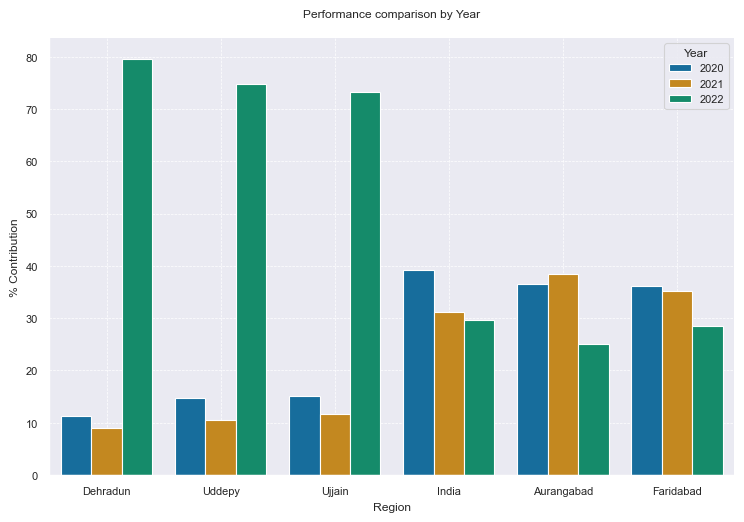

In [65]:
# Sorting values for beautification of visualization
df_region_compare.sort_values(by="% Contribution", ascending=False, inplace=True)

# Plotting the comparison graph
plot = sns.catplot(data=df_region_compare.reset_index(),
                   x="Region", y="% Contribution", hue="Year",
                   kind="bar", palette="colorblind",
                   aspect=1.5, legend_out=False)

plt.title("Performance comparison by Year", pad=15)
plt.grid(True, linewidth=0.5, linestyle="--")
plot.fig.show()

Insights:  
* India, Aurangabad and Faridabad are worst performing regions as their total visitor count has decreased in the year 2022 compared to year 2020.
* Dehradun, Uddepy and Ujjain have experienced a massive surge in the number of visitors in the year 2022 compared to year 2020.
* The geographic location of the worst and best performing regions appears to have no correlation.  

Recommendations:  
* Due to absence of product related data, all the recommendations to increase website traffic is based on general solutions.
> 1. The first reason could be lack of product awareness among people. This can be solved through focused marketing and educating the audience about the product and company.
> 2. Gather testimonials from the clients and customers and advertise them. For eg., Doctors testimonial for Health related product, ISO certifications for relevant products and best practices, etc.
> 3. Avail delivery options to remote areas. It could be possible that people from remote regions are facing difficulty to order the product. Alternatively, resort to convectional strategies for better reach like connecting with local shops for advertisement and product promotion.

Furthermore, more astute analysis can be done if more relevant data can be gathered, like online vs offline orders, age group of people, gender of customers etc.

##  2.3  Based on the given data, identify which region is having a better YearOnYear growth

To answer this we utilize the dataframe of section 2.2.

In [66]:
# Creating dataset of regions
df_best_region = df_region_compare.sort_values(by=["Region","Year"]).drop(columns=["% Contribution"])

# Calculating percent change of total visitors in each region year-on-year
df_best_region["Pct Change"] = df_best_region.groupby("Region").pct_change()["Value"]

# Filling 0 value for the year 2020
df_best_region.fillna(0, inplace=True)

# Displaying the data
df_best_region

Value  Pct Change
Region     Year                        
Aurangabad 2020     2.85497    0.000000
           2021     3.00058    0.051002
           2022     1.96448   -0.345300
Dehradun   2020    11.72070    0.000000
           2021     9.30998   -0.205681
           2022    82.12445    7.821120
Faridabad  2020    11.70281    0.000000
           2021    11.39358   -0.026424
           2022     9.21404   -0.191295
India      2020  1464.70407    0.000000
           2021  1161.42601   -0.207058
           2022  1108.65565   -0.045436
Uddepy     2020    43.76357    0.000000
           2021    31.30906   -0.284586
           2022   223.07017    6.124780
Ujjain     2020    11.76987    0.000000
           2021     9.20026   -0.218321
           2022    57.43265    5.242503

/var/folders/c3/3nqswztd4jz9mj4911xqxhrh0000gq/T/ipykernel_25710/528719534.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot.fig.show()


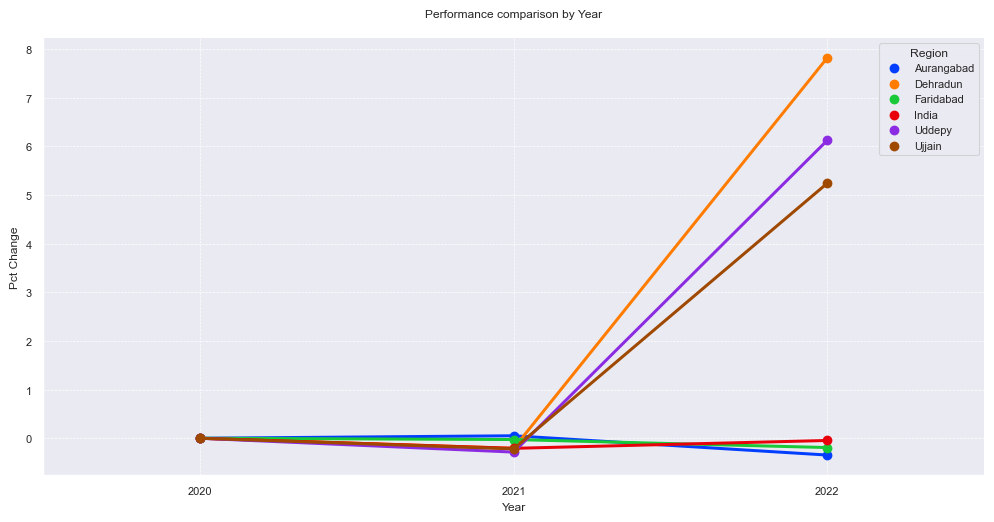

In [67]:
# Visualizing the data
plot = sns.catplot(df_best_region.reset_index(),
                   x="Year",y="Pct Change", hue="Region", 
                   kind="point", aspect=2, palette="bright", legend_out=False)
plt.title("Performance comparison by Year", pad=15)
plt.grid(True, linewidth=0.5, linestyle="--")
plot.fig.show()

Insights:  
* Dehradun, Uddepy and Ujjain are the top performers and show the best growth.
>* Dehradun has a 7.83% rise in 2022 after dropping a few points in 2021 (-0.21%).
>* Uddepy has a 6.12% rise in 2022 after dropping a few points in 2021 (-0.28%).
>* Ujjain has a 5.24% rise in 2022 after dropping a few points in 2021 (-0.22%).  

* All the other regions except Indore face an average decrease of around 0.22% overall.

##  2.4  Guess what could be the meaning of Level1 visitors, level 2 visitors up to level 5 and then answer the following- 
>1. Create a new feature (Level 5 visitors/Level 1 visitors) and what are the top 3 states based on that created feature for all the available segments and each given year. 
>2. Create any other metric apart from (Level5 visitors/Level1 visitors) and perform the same task as above. Compare if the states are same in both the questions, if they are different try to create a hypothesis about the reason behind it.

As discussed in section 1.2, On expanding the KPI to individual features, we obtain columns L1_visitor, L2_visitor, L3_visitor, L4_visitor, L5_visitor. Furthermore, a pattern can be observed such that sum of value decreases as we move one level up i.e L1_visitor has the highest sum of value whereas L5_visitor has the lowest sum of value. As per the pattern, it can be assumed that the possible definations of these indicators could be the **" *category of the visitor* "** as per their engagement behaviour and the value indicate the **" *total number of visitors per month* "** by that visitor category. 

The categories could be:  

1.   **The Browser**: Browsing and looking for products they dont actually want and least likely to buy.
2.   **The Price Hunter**: Looking for the products they actually want and checking for best deal accross various websites.
3.   **The repeat visitor**: Aware of your website and products and somewhat likely to buy in near future.
4.   **The Buyer**: The actual people that businesses are looking for. They are most likely to buy some product from your website.
5.   **The repeat buyer**: They trust your website and brand and keep buying stuff frequently.



### 2.4.1 Create a new feature (Level 5 visitors/Level 1 visitors) and what are the top 3 states based on that created feature for all the available segments and each given year.

In [68]:
# Selecting data for analysis
df_state_segment_compare = transformed_df.drop(columns=["Month","Lv2_Visitors","Lv3_Visitors","Lv4_Visitors","Value Type"])

# Creating the new feature (Lv5_Visitors/Lv1_Visitors)
df_state_segment_compare["Lv5/Lv1"] = df_state_segment_compare["Lv5_Visitors"]/df_state_segment_compare["Lv1_Visitors"]

# Dropping irrelevant columns
df_state_segment_compare.drop(columns=["Lv1_Visitors","Lv5_Visitors"], inplace=True)

# Grouping data as per given problem statement ("Region","Year" and "Segment")
# Here we use average conversion rate while grouping
df_state_segment_compare = df_state_segment_compare.groupby(by=["Year","Region","Segment"]).mean().sort_values(by=["Segment","Lv5/Lv1"], ascending=False)

# Displaying the data
df_state_segment_compare.head()

Lv5/Lv1
Year Region     Segment            
2020 Faridabad  Customers  0.182661
     Uddepy     Customers  0.150219
     Ujjain     Customers  0.139729
     Aurangabad Customers  0.136325
     Dehradun   Customers  0.123707

Visualizing data for year 2020

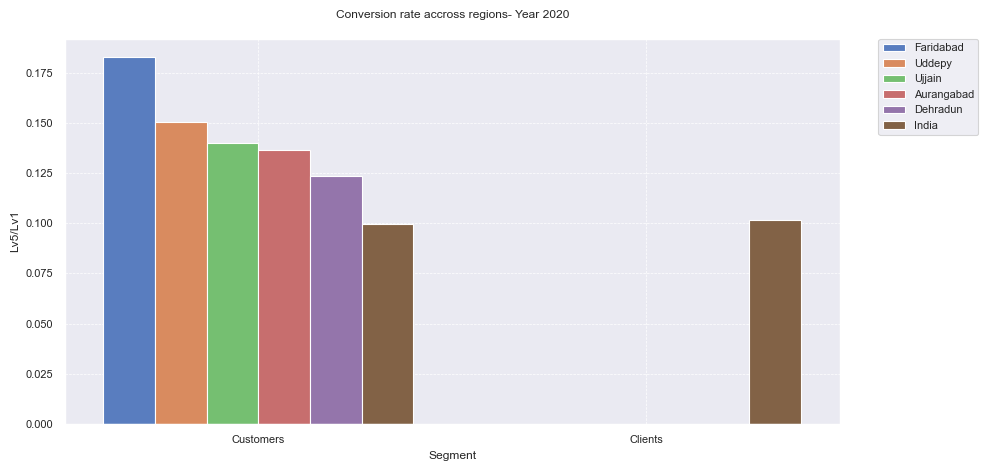

In [69]:
plt.figure(figsize=(10,5))
sns.barplot(data= df_state_segment_compare.loc[2020].reset_index(),
            x="Segment", y="Lv5/Lv1", hue="Region", palette="muted")
plt.title("Conversion rate accross regions- Year 2020", pad=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.grid(True, linewidth=0.5, linestyle="--")

Highlights Year 2020:  

* For Customer segment:-
>1. Faridabad, Uddepy and Ujjain are the top 3 performers.
>2. Indore has no contribution in the Year 2020.  

* For Client segment:-
>1. "India" region is the only contributer in this segment.

Visualizing data for year 2021

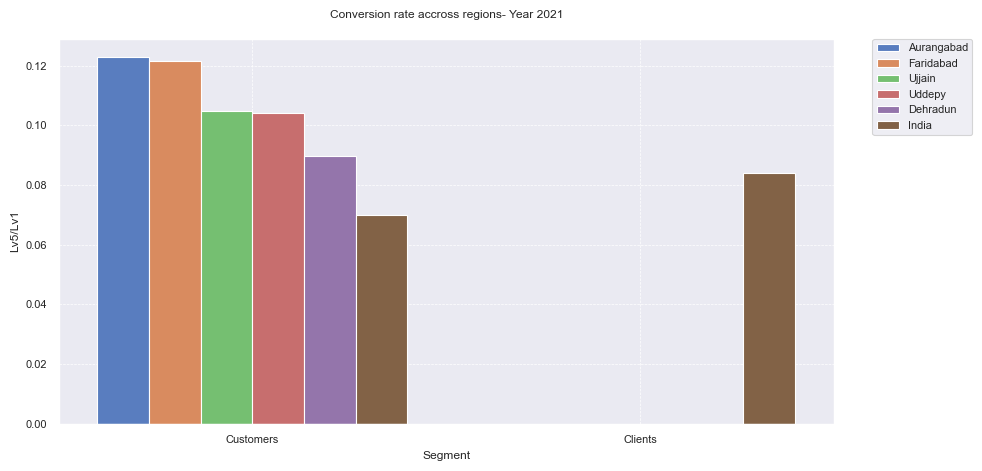

In [70]:
plt.figure(figsize=(10,5))
sns.barplot(data= df_state_segment_compare.loc[2021].reset_index(),
            x="Segment", y="Lv5/Lv1", hue="Region", palette="muted")
plt.title("Conversion rate accross regions- Year 2021", pad=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.grid(True, linewidth=0.5, linestyle="--")

Highlights Year 2021:  

* For Customer segment:-
>1. Aurangabad, Faridabad, and Ujjain are the top 3 performers.
>2. Indore has no contribution in the Year 2021.
>3. Ujjain and Uddepy have a close competition for the 3rd place

* For Client segment:-
>1. "India" region is the only contributer in this segment.

Visualizing data for year 2022

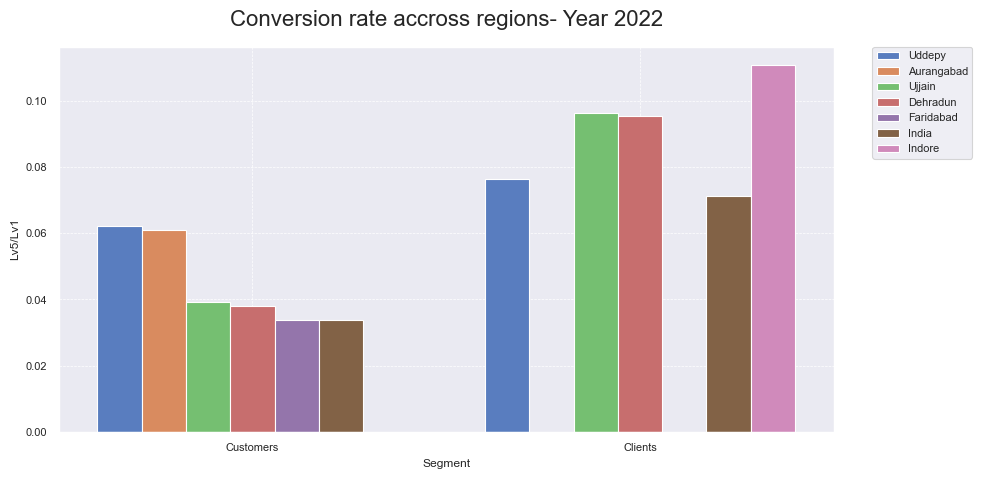

In [71]:
plt.figure(figsize=(10,5))
sns.barplot(data= df_state_segment_compare.loc[2022].reset_index(),
            x="Segment", y="Lv5/Lv1", hue="Region", palette="muted")
plt.title("Conversion rate accross regions- Year 2022", fontsize=16,pad=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.grid(True, linewidth=0.5, linestyle="--")

Highlights Year 2022:  

* For Customer segment:-
>1. Uddepy, Aurangabad and Ujjain are the top 3 performers.
>2. Dehradun has close competiton with Ujjain for 3rd place.
>3. Faridabad and India are tied at the last position.  

* For Client segment:-
>1. "Indore" is introduced this year and is the highest contributer in this segment.
>2. Uddepy, Ujjain and Dehradun have gained visitors in client segment this year along with "India" region.
>3. Aurangabad and Faridabad are still absent in this segment.

Insights:  
* The Lv5/Lv1 feature created can be called as conversion rate between "The Browser" and "The repeat buyer" category.
* All regions do not contribute to both segments as discussed in Highlight sections above.

### 2.4.2 Create any other metric apart from (Level5 visitors/Level1 visitors) and perform the same task as above. Compare if the states are same in both the questions, if they are different try to create a hypothesis about the reason behind it.

As per our understanding, the metrics created is conversion rate. Hence, another feature could be conversion rate of the browser (Lv1_Visitors) to other categories (Lv2_Visitors,Lv3_Visitors,Lv4_Visitors). Therefore, creating new metrics (Lv4/Lv1, Lv3/Lv1, Lv2/Lv1).

In [72]:
# Selecting data for analysis
df_new_feature_compare = transformed_df.copy()

# Creating new features
df_new_feature_compare["Lv5/Lv1"] = df_new_feature_compare["Lv5_Visitors"]/df_new_feature_compare["Lv1_Visitors"]
df_new_feature_compare["Lv4/Lv1"] = df_new_feature_compare["Lv4_Visitors"]/df_new_feature_compare["Lv1_Visitors"]
df_new_feature_compare["Lv3/Lv1"] = df_new_feature_compare["Lv3_Visitors"]/df_new_feature_compare["Lv1_Visitors"]
df_new_feature_compare["Lv2/Lv1"] = df_new_feature_compare["Lv2_Visitors"]/df_new_feature_compare["Lv1_Visitors"]

# Selecting relevant columns
df_new_feature_compare = df_new_feature_compare[["Year","Segment","Region","Lv5/Lv1","Lv4/Lv1","Lv3/Lv1","Lv2/Lv1"]]

# Merging columns to rows for plotting data
df_new_feature_compare = df_new_feature_compare.melt(id_vars=["Year","Segment","Region"], value_vars=["Lv5/Lv1","Lv4/Lv1","Lv3/Lv1","Lv2/Lv1"],
                                                     var_name="Conversion Category", value_name="Conversion Rate")

# Displaying the data
df_new_feature_compare

,Year,Segment,Region,Conversion Category,Conversion Rate
0,2020,Clients,India,Lv5/Lv1,0.109528
1,2020,Customers,Aurangabad,Lv5/Lv1,0.123873
2,2020,Customers,Dehradun,Lv5/Lv1,0.134069
3,2020,Customers,Faridabad,Lv5/Lv1,0.158915
4,2020,Customers,India,Lv5/Lv1,0.100223
...,...,...,...,...,...
1195,2022,Customers,Dehradun,Lv2/Lv1,0.590824
1196,2022,Customers,Faridabad,Lv2/Lv1,0.710958
1197,2022,Customers,India,Lv2/Lv1,0.701989
1198,2022,Customers,Uddepy,Lv2/Lv1,0.601489


Comparing the data using visualizations

/var/folders/c3/3nqswztd4jz9mj4911xqxhrh0000gq/T/ipykernel_25710/570393023.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot.fig.show()


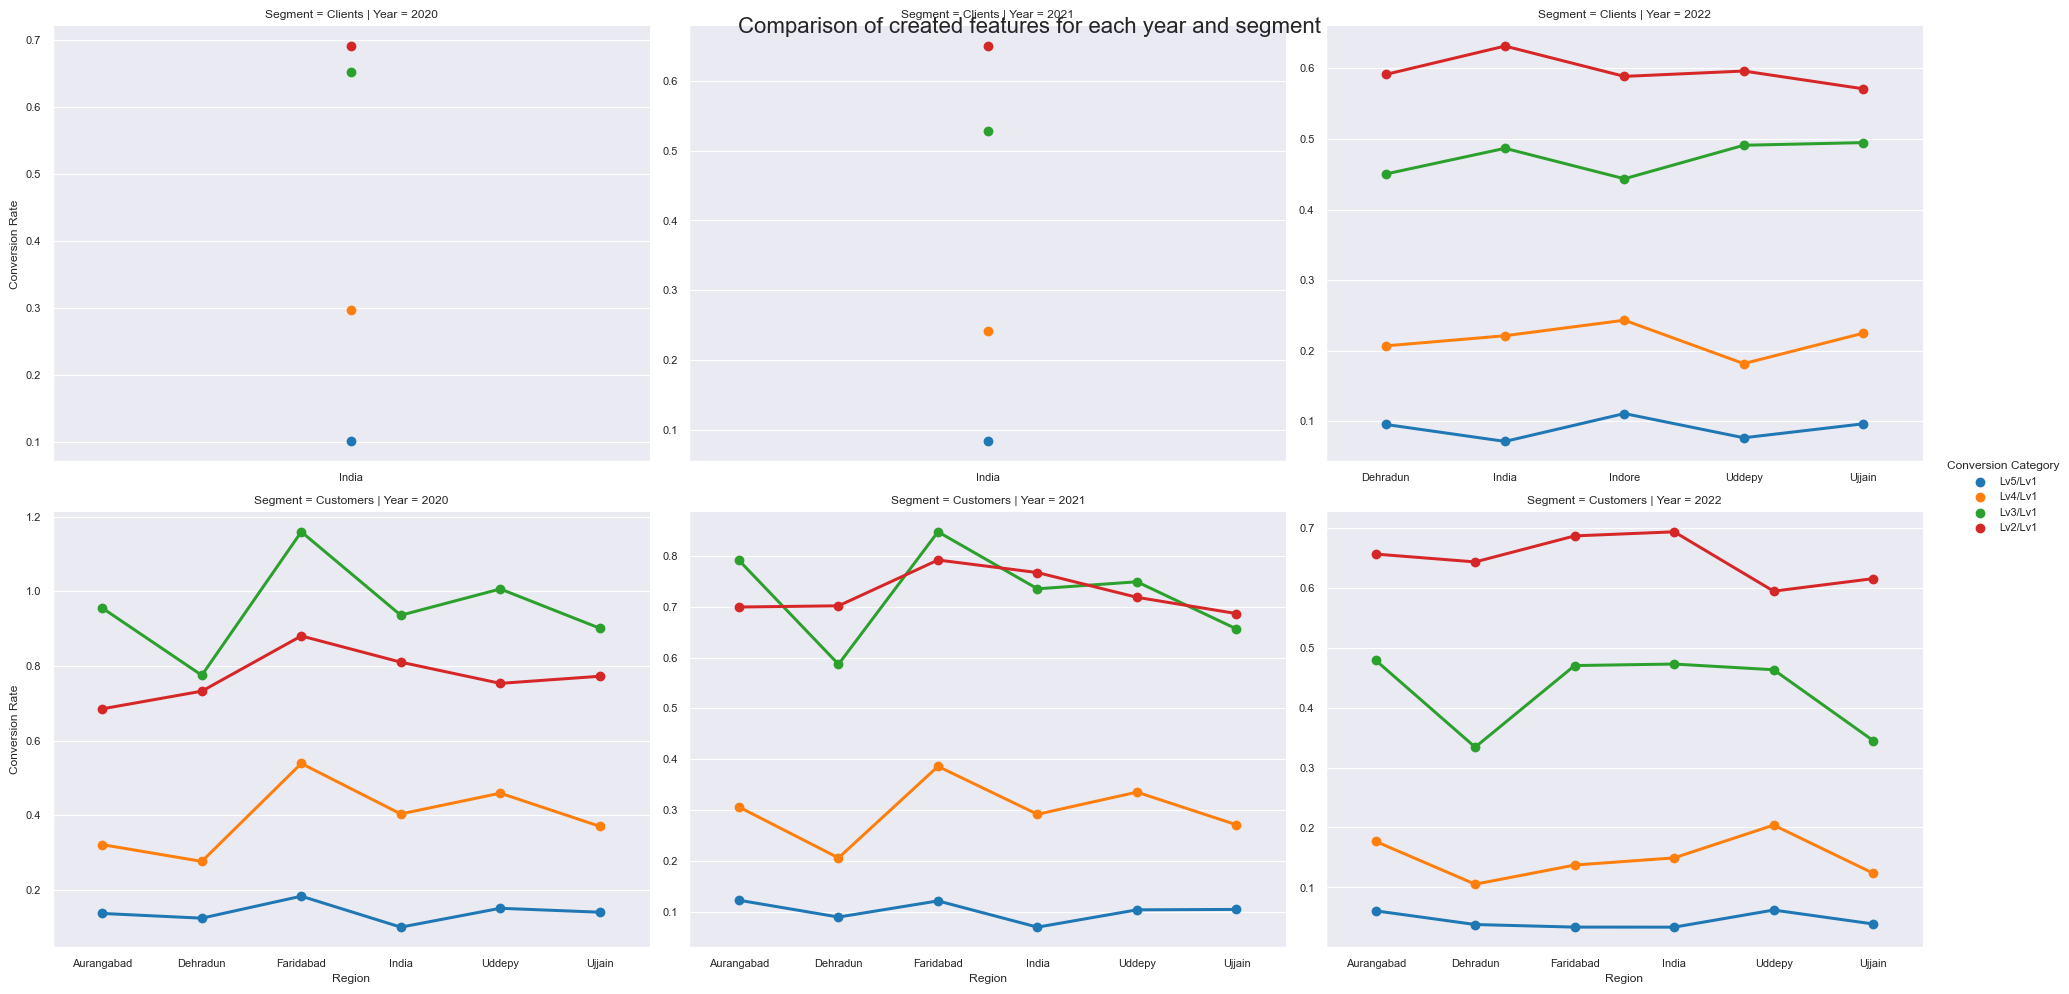

In [74]:
# Plotting the data
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=0.9)
plot = sns.catplot(data=df_new_feature_compare, x="Region", y="Conversion Rate", 
            col="Year", row="Segment", hue="Conversion Category", kind="point", 
            sharex=False, sharey=False, aspect=1.3, errorbar=None)
plot.fig.suptitle("Comparison of created features for each year and segment", fontsize=16)
plot.fig.show()